In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv(r"D:\ML Projects\insurance.csv")


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['region'].unique()
df['smoker'].unique()
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [6]:
from sklearn import preprocessing
reg = preprocessing.LabelEncoder()
reg.fit(['southwest','southeast','northwest','northeast'])
df['region']=reg.transform(df['region'])

smo = preprocessing.LabelEncoder()
smo.fit(['yes','no'])
df['smoker'] = smo.transform(df['smoker'])

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['female','male'])
df['sex'] = le_sex.transform(df['sex'])



In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [9]:
df.describe().columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0, 0.5, 'Charges')

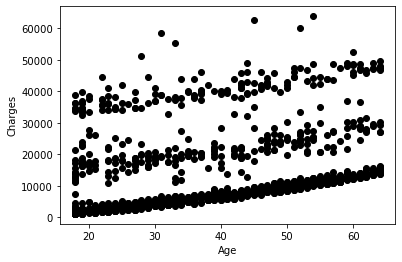

In [40]:
plt.scatter(df.age,df.charges,color = 'black')
plt.xlabel("Age")
plt.ylabel("Charges")


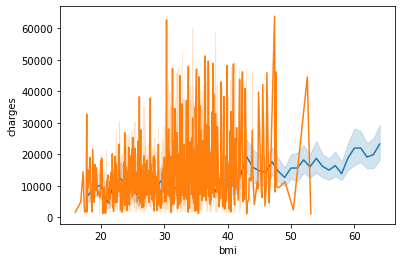

In [41]:
sns.lineplot(df['age'],df['charges'])
sns.lineplot(df['bmi'],df['charges'])

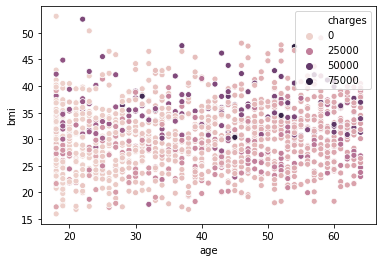

In [42]:
sns.scatterplot(df['age'],df['bmi'],hue=df['charges'])

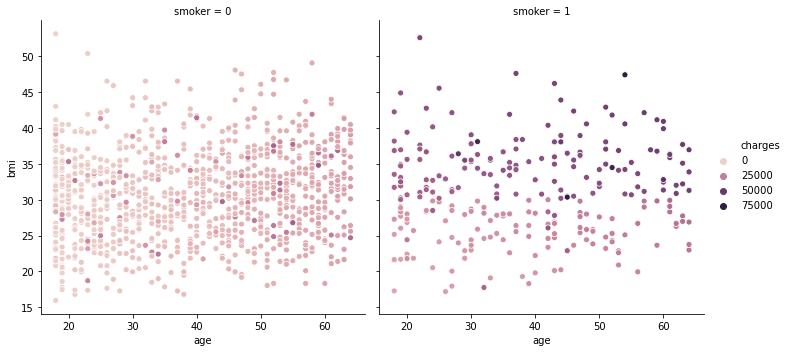

In [43]:
sns.relplot(x='age',y='bmi',hue='charges',col='smoker',data=df)

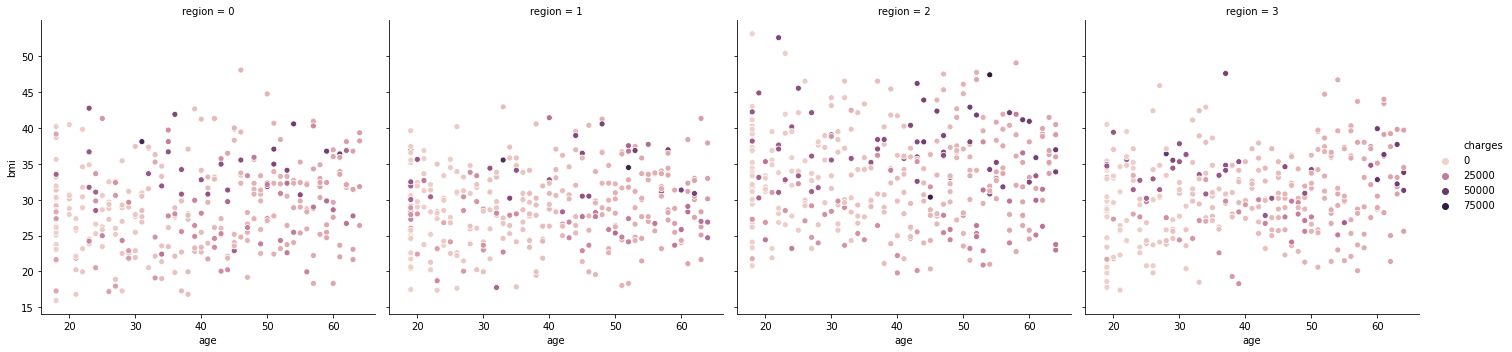

In [44]:
sns.relplot(x='age',y='bmi',hue='charges',col='region',data=df)

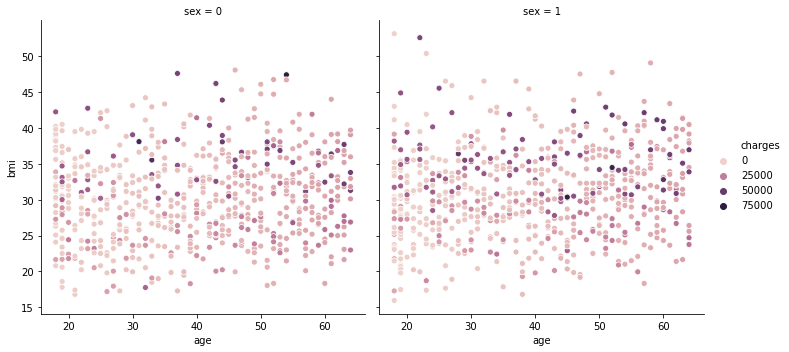

In [45]:
sns.relplot(x='age',y='bmi',hue='charges',col='sex',data=df)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
X = df.drop(['charges'],axis =1).values

In [11]:
y = df['charges']

In [12]:
X.shape

(1338, 6)

In [13]:
y.shape

(1338,)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

# USING DICISION TREES

In [16]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [20]:
y_pred=model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print("r2 socre is",r2_score(y_pred,y_test))
print("mean square error is", mean_squared_error(y_pred,y_test))

r2 socre is 0.7393300538165959
mean square error is 47167362.14150517


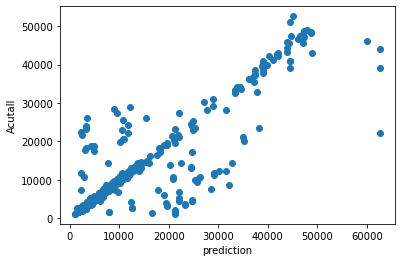

In [21]:
plt.scatter(y_pred,y_test)
plt.xlabel("prediction")
plt.ylabel("Acutall")
plt.show()

# USING KNN 

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from math import sqrt
knn = KNeighborsRegressor(n_neighbors=10)
y_pred = cross_val_predict(knn, X, y, cv=5)

In [25]:
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y,y_pred))

11166.865570241607
0.14906146753181626


In [26]:
error = []
for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    error.append(mean_squared_error(y,y_pred)) 

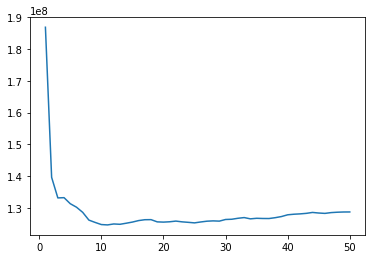

In [27]:
plt.plot(range(1,51),error)

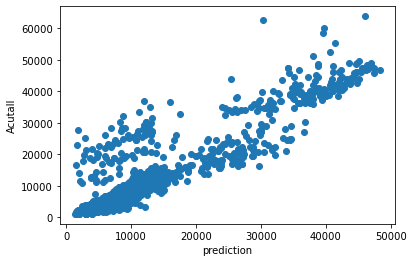

In [41]:
plt.scatter(y_pred,y)
plt.xlabel("prediction")
plt.ylabel("Acutall")
plt.show()

# PIPELINING

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [29]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))

In [30]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=5)
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y,y_pred))

5177.225565028013
0.8170932268269976


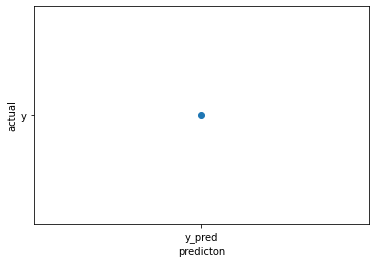

In [31]:
plt.scatter('y_pred','y')
plt.xlabel("predicton")
plt.ylabel("actual")
plt.show()

In [25]:
error = []
for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    error.append(mean_squared_error(y,y_pred)) 

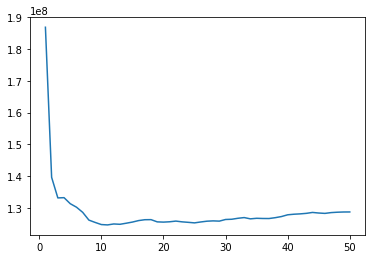

In [26]:
plt.plot(range(1,51),error)

# USING KFOLD

In [33]:
from sklearn.model_selection import KFold

In [34]:
cv = KFold(n_splits=5, random_state=0, shuffle=False)

C:\Users\Ketan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [35]:
from sklearn.linear_model import LinearRegression
classifier_pipeline = make_pipeline(StandardScaler(), LinearRegression())
y_pred2 = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print(sqrt(mean_squared_error(y,y_pred2)))
print(r2_score(y,y_pred2))

6071.255961117072
0.7484683152407766
